<a href="https://colab.research.google.com/github/Mariana-Arantes/data_science/blob/main/Analisando_os_Dados_do_AirbnbNY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<center>


## **Analisando Dados do Airbnb - Nova York**


---

![](https://raw.githubusercontent.com/Mariana-Arantes/data_science/main/NY3.jpg)





</center>

Com um horizonte conhecido em qualquer parte do mundo e 8,4 milhões de habitantes, a cidade de Nova York oferece muita diversão e atrações de todos os tipos.

A cidade de Nova York compreende 5 distritos situados no encontro do rio Hudson com o Oceano Atlântico. No centro da cidade fica Manhattan, um distrito com alta densidade demográfica que está entre os principais centros comerciais, financeiros e culturais do mundo. Entre seus pontos emblemáticos, destacam-se arranha-céus, como o Empire State Building e o enorme Central Park. O teatro da Broadway fica em meio às luzes de neon da Times Square.


Toda essa diversidade e riqueza de cultura chama a atenção de turistas de várias partes do mundo, atraindo mais de 50 milhões de  visitantes a cidade todos os anos.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

E pensando nesse mercado extraordinário, em 2008 os três estudantes de design Nathan Blecharczyk, Brian Chesky e Joe Gebbia desenvolveram a primeira versão do site de hospedagens da [Airbnb](https://www.airbnb.com.br/), com apenas 1 opção. Eles nunca poderiam imaginar que quatro anos depois, a Aibnb se tornaria uma das principais plataformas de oferta de hospedagens do mundo.
A Airbnb é uma plataforma comunitária de acomodações para viajantes que vem crescendo cada dia mais. Com ele, é possível alugar ou oferecer acomodações ao redor do mundo inteiro, e de todos os tipos, desde casas e pousadas até barcos, iglus, casas na árvore e castelos.

Uma das iniciativas da Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.



**Neste *notebook*, iremos analisar os dados referentes à cidade New York, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).


Para esta análise exploratória inicial, foi utilizado o arquivo * `listings.csv`.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página há uma versão mais completa no mesmo endereço.

Mas antes precisamos importar os pacotes necessários para esta análise.

In [ ]:
# importar os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-12-10/visualisations/listings.csv")


## Análise dos Dados

O objetivo desta etapa é trazer uma visão inicial e permitir um melhor entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias



Antes de iniciar qualquer análise, podemos observar as 5 primeiras entradas do *dataset*.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Podemos identificar na lista abaixo que este conjunto de dados possui 36.923 entradas, 16 variáveis de 3 tipos diferentes.



In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos de variáveis no dataset
display(df.dtypes)

Entradas:	 36923
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
É importante verificar logo no início se os valores nulos são significativos comparados ao total de entradas, pois a qualidade de um *dataset* está diretamente relacionada a quantidade de valores ausentes.
Analisando o resultado abaixo, podemos observar que:
- As colunas `reviews_per_month` e `last_review` possuem 25% dos seus valores ausentes.

- As colunas `name` e `host_name` possuem aproximadamente 0,3% dos seus valores ausentes.


In [ ]:
# ordenar em ordem decrescente o % das variáveis com valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.254151
last_review                       0.254151
name                              0.000352
host_name                         0.000244
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Há *outliers* presentes?**

Verificar também a presença de *outliers* é muito é importante para que a análise dos dados seja feita de maneira mais assertiva.

*Outliers são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva. Em outras palavras, um outlier é um valor que foge da normalidade podendo (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.*

E podemos ver pela distribuição do histograma abaixo, a presença de *outliers* nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição coerente e distorcem toda a representação gráfica. 


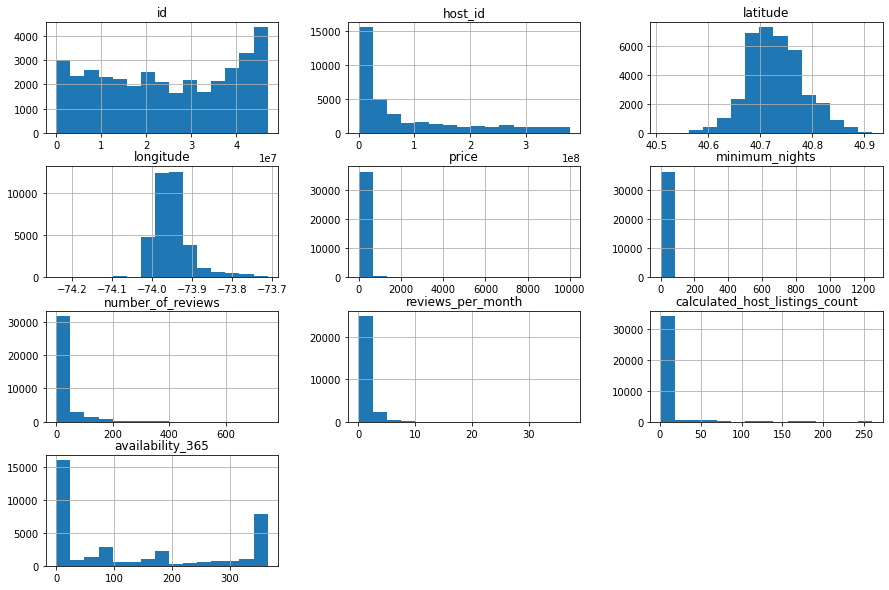

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


Olhando o resumo estatítico a seguir, verificamos na coluna `price` que 75% dos aluguéis possuem o valor abaixo de 159 dólares, porém seu valor máximo é 10.000 dólares.
Já a quantidade máxima de noites (coluna `minimum_nigths`) é de 1.250, o que ultrapassa 365 dias no ano.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36923.000000,36923.000000,36923.000000,27539.000000,36923.000000,36923.000000
mean,145.921187,23.674647,23.182298,0.892762,8.947946,134.103513
std,268.388200,26.779132,48.066110,1.305804,31.080929,147.640898
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,61.000000,4.000000,0.000000,0.110000,1.000000,0.000000
50%,100.000000,30.000000,4.000000,0.370000,1.000000,77.000000
75%,159.000000,30.000000,21.000000,1.170000,2.000000,313.000000
max,10000.000000,1250.000000,748.000000,37.280000,260.000000,365.000000


#### **Boxplot para minimum_nights e price**
Outro método que podemos utilizar para verificar a presença de *outliers* é o Boxplot (Diagrama de caixa), que apresenta a variação de dados observados de uma variável numérica por meio de quartis.

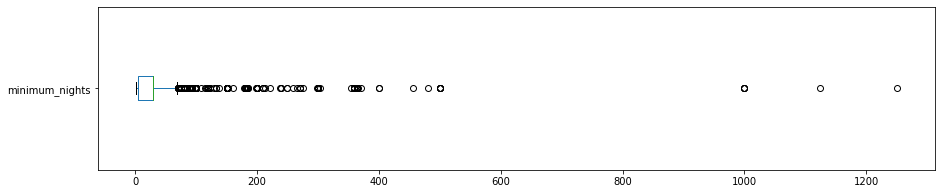

minimum_nights: valores acima de 30:
1172 entradas
3.1742%


In [ ]:
#minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#ver quantidade de valores acima de 30 dias para minimun_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

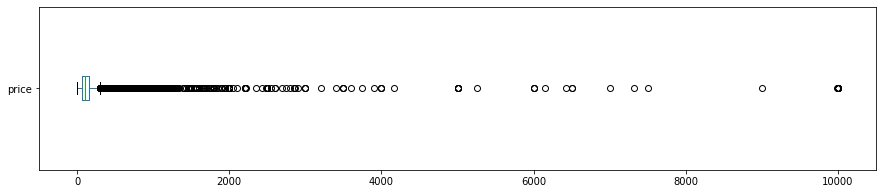


price: valores acima de 1000:
249 entradas
0.6744%


In [ ]:
#price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

#ver quantidade de valores acima de 1000 dias para price
print("\nprice: valores acima de 1000:")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))



**Histograma sem *outliers***

Já que identificamos *outliers* em 3 variáveis, vamos limpar o *DataFrame* excluíndo os dados da variável `price` acima de 1000 dólares, `minimum_nights` acima de 30 dias e `calculated_host_listings_count` acima de 4 imóveis por anfitrião. 

Assim podemos exibir novamente o histograma e observar os dados mais coerentes.

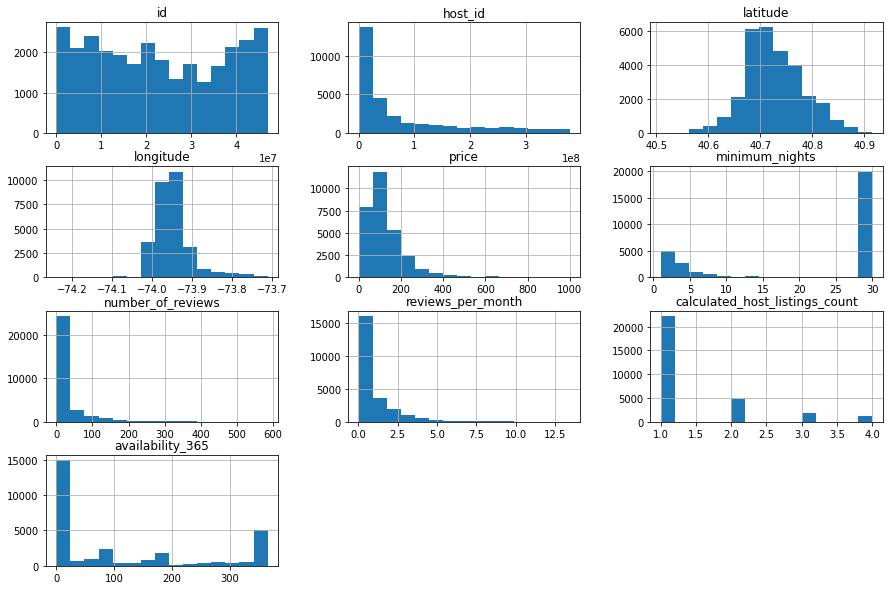

In [ ]:
#remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 4].index, axis=0, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. Neste contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse vou:
- Criar uma matriz de correlação
- gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.010681,-0.047839,-0.051425,-0.090368,0.074799
minimum_nights,0.010681,1.000000,-0.236188,-0.386438,-0.140722,-0.219732
number_of_reviews,-0.047839,-0.236188,1.000000,0.723713,0.102818,0.222604
reviews_per_month,-0.051425,-0.386438,0.723713,1.000000,0.155196,0.259063
calculated_host_listings_count,-0.090368,-0.140722,0.102818,0.155196,1.000000,0.244969
availability_365,0.074799,-0.219732,0.222604,0.259063,0.244969,1.000000


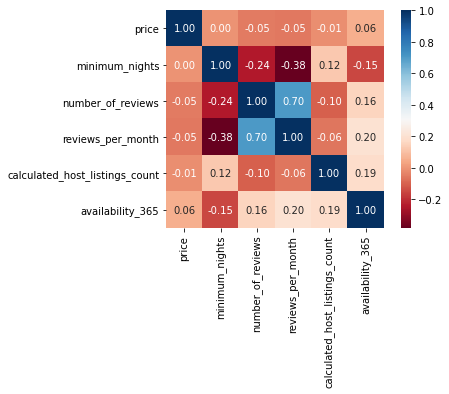

In [ ]:
## plotar um heatmap a partir das correlações (exibe matriz correção em gráfico para mostrar quais variáveis estão mais ligadas a outras)
sns.heatmap(corr,cmap='RdBu', fmt='.2f', square=True, linecolor='White', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Através do método `value_counts()` podemos contar a quantidade de cada tipo de imóvel disponível e seus percentuais.

Notamos que 52% dos imóveis são "Casa/Apartamento privado" (18.518) e 45% são "Quartos privados" (16.075).

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    16060
Private room       13342
Shared room          469
Hotel room            51
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.536729
Private room       0.445893
Shared room        0.015674
Hotel room         0.001704
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**
Uma maneira para verificar uma variável em função da outra é usando `groupby()`. 

Podemos então comparar os 10 bairros com valor de diárias mais altas a partir do preço de locação.


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Prince's Bay         397.500000
Neponsit             350.000000
Tottenville          309.000000
Willowbrook          309.000000
Tribeca              287.728155
Belle Harbor         258.500000
Woodrow              255.000000
SoHo                 248.400881
NoHo                 225.102041
Flatiron District    221.789474
Name: price, dtype: float64

Como são fornecidas no arquivo as Latitudes e Longitudes dos imóveis, podemos utilizar outra forma de visualizar a distribuição dos imóveis por preço através do *scatterplot*, ou gráfico de dispersão. Mas a presença dominante da cor azul é um indicativo que existem ainda *outliers* no dataset.



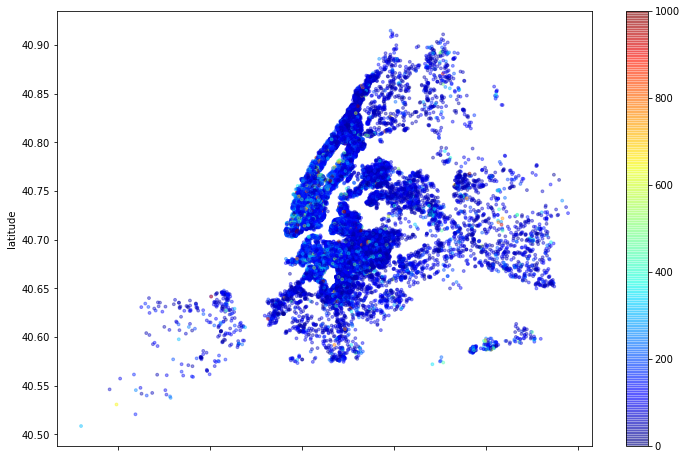

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Esta foi feita apenas uma análise superficial na base de dados do Airbnb referente a cidade de Nova York, onde mesmo ainda com a existência de outliers em algumas das variáveis em nosso *DataFrame* já se consegue tirar alguns insights úteis para quem pretende visitar a cidade.
